# Optical Recognition of Handwritten Digits Data Set
## Introduction
Preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form have been used. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions. 

### Importing Necessary Libraries

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
%matplotlib inline

### Selecting Class Column
Taking the last column of the Dataset as "class" or the target column, as mentioned in the dataset repository.


In [83]:
columns = [num for num in range(64)]
columns.append("class")

In [84]:
columns

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 'class']

### Reading optdigits(train).csv file to a Dataframe

In [85]:
testtarget = dftest.loc[:,"class"]
datatest = dftest.iloc[:,0:-1]

In [86]:
df = pd.read_csv("optdigits(train).csv", names=columns)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


### Reading optdigits(test).csv file to a Dataframe

In [87]:
dftest = pd.read_csv("optdigits(test).csv", names=columns)
dftest.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [88]:
target.head()

0    0
1    0
2    7
3    4
4    6
Name: class, dtype: int64

In [89]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


### Plotting a row of data
We have resized each row of data consisting 64columns as 8cross8 array to plot the character.

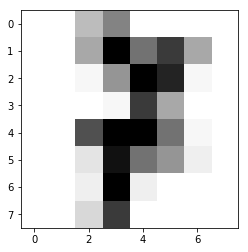

In [90]:
x_train = np.array(data)
plot_data = x_train[200]
plot_data = plot_data.reshape(8,8)
plt.imshow(plot_data,cmap="Greys")

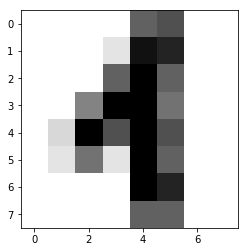

In [91]:
x_test = np.array(datatest)
plot_data = x_test[200]
plot_data = plot_data.reshape(8,8)
plt.imshow(plot_data,cmap="Greys")

## Applying Neural Network Model for Train Data

In [92]:
model = keras.models.Sequential([
            keras.layers.Dense(31, activation=tf.nn.tanh, input_shape=(x_train[0].shape), kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [93]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(0.01),
             metrics=['accuracy'])

In [94]:
history  = model.fit(x_train,np.array(target),epochs=10,verbose=2, validation_split=0.2)

Train on 3058 samples, validate on 765 samples
Epoch 1/10
 - 0s - loss: 1.6411 - acc: 0.4820 - val_loss: 1.1757 - val_acc: 0.7203
Epoch 2/10
 - 0s - loss: 0.9936 - acc: 0.7819 - val_loss: 0.8514 - val_acc: 0.8275
Epoch 3/10
 - 0s - loss: 0.7653 - acc: 0.8538 - val_loss: 0.6965 - val_acc: 0.8654
Epoch 4/10
 - 0s - loss: 0.6378 - acc: 0.8810 - val_loss: 0.6057 - val_acc: 0.9007
Epoch 5/10
 - 0s - loss: 0.5527 - acc: 0.9045 - val_loss: 0.5297 - val_acc: 0.9124
Epoch 6/10
 - 0s - loss: 0.4920 - acc: 0.9169 - val_loss: 0.4820 - val_acc: 0.9163
Epoch 7/10
 - 0s - loss: 0.4418 - acc: 0.9274 - val_loss: 0.4442 - val_acc: 0.9203
Epoch 8/10
 - 0s - loss: 0.4037 - acc: 0.9343 - val_loss: 0.4133 - val_acc: 0.9281
Epoch 9/10
 - 0s - loss: 0.3762 - acc: 0.9388 - val_loss: 0.3881 - val_acc: 0.9242
Epoch 10/10
 - 0s - loss: 0.3505 - acc: 0.9438 - val_loss: 0.3726 - val_acc: 0.9346


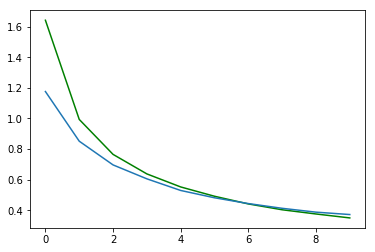

In [95]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'])

In [96]:
loss, accuracy = model.evaluate(xtest,ytest)

540/540 [==============================] - ETA:  - 0s 33us/step


### Accuracy for Train Data

In [97]:
print(accuracy*100)

90.74074060828598


### Applying Neural Network Model for Test Data

In [98]:
model = keras.models.Sequential([
            keras.layers.Dense(31, activation=tf.nn.tanh, input_shape=(x_test[0].shape), kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [99]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(0.01),
             metrics=['accuracy'])

In [100]:
history  = model.fit(x_test,testtarget,epochs=10,verbose=2, validation_split=0.2)

Train on 1437 samples, validate on 360 samples
Epoch 1/10
 - 0s - loss: 2.1662 - acc: 0.2457 - val_loss: 1.8354 - val_acc: 0.3694
Epoch 2/10
 - 0s - loss: 1.5673 - acc: 0.5212 - val_loss: 1.4981 - val_acc: 0.5861
Epoch 3/10
 - 0s - loss: 1.2609 - acc: 0.6903 - val_loss: 1.2850 - val_acc: 0.6889
Epoch 4/10
 - 0s - loss: 1.0678 - acc: 0.7697 - val_loss: 1.1634 - val_acc: 0.7139
Epoch 5/10
 - 0s - loss: 0.9329 - acc: 0.8114 - val_loss: 1.0522 - val_acc: 0.7444
Epoch 6/10
 - 0s - loss: 0.8314 - acc: 0.8490 - val_loss: 0.9810 - val_acc: 0.7583
Epoch 7/10
 - 0s - loss: 0.7500 - acc: 0.8692 - val_loss: 0.9282 - val_acc: 0.7639
Epoch 8/10
 - 0s - loss: 0.6818 - acc: 0.8880 - val_loss: 0.8711 - val_acc: 0.7972
Epoch 9/10
 - 0s - loss: 0.6213 - acc: 0.9005 - val_loss: 0.8282 - val_acc: 0.7944
Epoch 10/10
 - 0s - loss: 0.5723 - acc: 0.9158 - val_loss: 0.7987 - val_acc: 0.8028


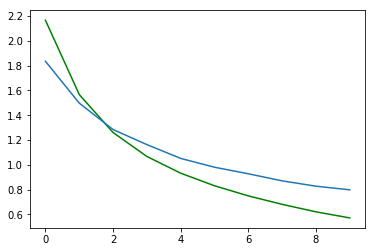

In [101]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'])

In [102]:
loss, accuracy = model.evaluate(xtest,ytest)

540/540 [==============================] - ETA:  - 0s 42us/step


### Accuracy for Test Data

In [103]:
print(accuracy*100)

89.62962958547804
